In [22]:
from os.path import join, dirname, abspath
import yaml

import matplotlib.pyplot as plt

from pypsa import Network

from postprocessing.utils import *

import pickle

### Parameters

### Loading solved nets

In [23]:
main_case = '02_corrected_snapshot_weightings'
output_dir = f'../../output/pscc2022/{main_case}/'

# Optimal net
optimal_case = "optimal"
optimal_net = Network()
optimal_net.import_from_csv_folder(f"{output_dir}{optimal_case}/")

# Read config
config = yaml.load(open(f"{output_dir}/{optimal_case}/config.yaml", 'r'), Loader=yaml.FullLoader)
epsilons = config["epsilons"]

# 'Bus' nets
buses_ids = ['FR', 'DE', 'BE', 'CH', 'GB']
bus_nets = {eps: {bus: Network() for bus in buses_ids} for eps in epsilons}
for bus in buses_ids:
    for eps in epsilons:
        bus_nets[eps][bus].import_from_netcdf(f"{output_dir}{bus}/{eps}/net.nc")

# 'Whole' nets
whole_case = "whole"
whole_cases = epsilons
whole_nets = {eps: Network() for eps in epsilons}
for eps in epsilons:
    whole_nets[eps].import_from_netcdf(f"{output_dir}{whole_case}/{eps}/net.nc")

/home/duboisa1/miniconda3/envs/replan/lib/python3.7/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/duboisa1/miniconda3/envs/replan/lib/python3.7/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network  has buses, carriers, generators, links, loads, storage_units
/home/duboisa1/miniconda3/envs/replan/lib/python3.7/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.uni

/home/duboisa1/miniconda3/envs/replan/lib/python3.7/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/duboisa1/miniconda3/envs/replan/lib/python3.7/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network net.nc has buses, carriers, generators, links, loads, storage_units
/home/duboisa1/miniconda3/envs/replan/lib/python3.7/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use ind

/home/duboisa1/miniconda3/envs/replan/lib/python3.7/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/duboisa1/miniconda3/envs/replan/lib/python3.7/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network net.nc has buses, carriers, generators, links, loads, storage_units
/home/duboisa1/miniconda3/envs/replan/lib/python3.7/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use ind

In [24]:
def get_net(case):
    if case == optimal_case:
        net = optimal_net
    elif case in whole_cases:
        net = whole_nets[case]
    else:
        eps, bus = case.split("_")
        net = bus_nets[float(eps)][bus]
    return net

## Costs

In [25]:
# Optimal cost
optimal_cost = get_total_cost(optimal_net)
print(f"Optimal costs: {round(optimal_cost, 2)}")

# Bus cases costs
costs_all = pd.DataFrame(columns=epsilons, index=buses_ids, dtype=float)
for eps in epsilons:    
    for bus in buses_ids:
        net = get_net(f'{eps}_{bus}')
        costs_all.loc[bus, eps] = get_total_cost(net)
print(f"\nCosts\n{costs_all.round(2)}")
        
# Cost increase (%)
print(f'\nCost increase (%)\n{costs_all/optimal_cost-1}')

Optimal costs: 101.26

Costs
    0.0125  0.0250  0.0500  0.1000  0.2000
FR  102.52  103.79  106.32  111.38  121.51
DE  102.52  103.79  106.32  111.38  121.51
BE  102.52  103.79  106.32  111.38  121.51
CH  102.52  103.79  106.32  111.38  121.51
GB  102.52  103.79  106.32  111.38  121.51

Cost increase (%)
    0.0125  0.0250  0.0500  0.1000  0.2000
FR  0.0125   0.025    0.05     0.1     0.2
DE  0.0125   0.025    0.05     0.1     0.2
BE  0.0125   0.025    0.05     0.1     0.2
CH  0.0125   0.025    0.05     0.1     0.2
GB  0.0125   0.025    0.05     0.1     0.2


## Network

0.0125
0.025
0.05
0.1
0.2


/home/duboisa1/miniconda3/envs/replan/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


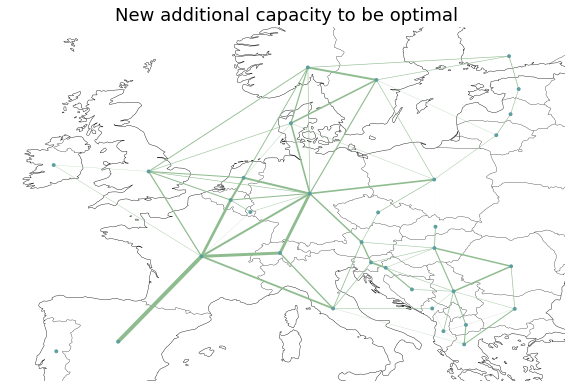

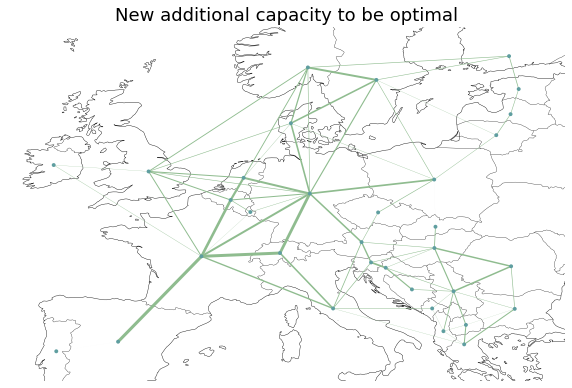

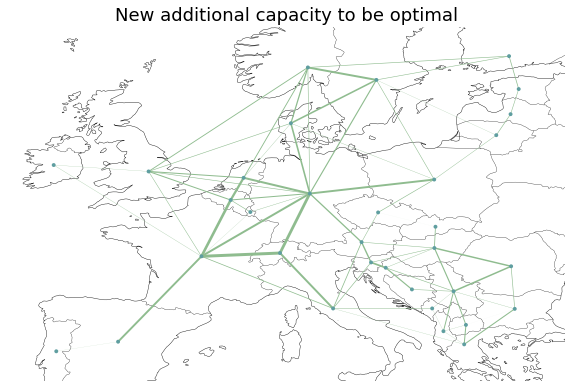

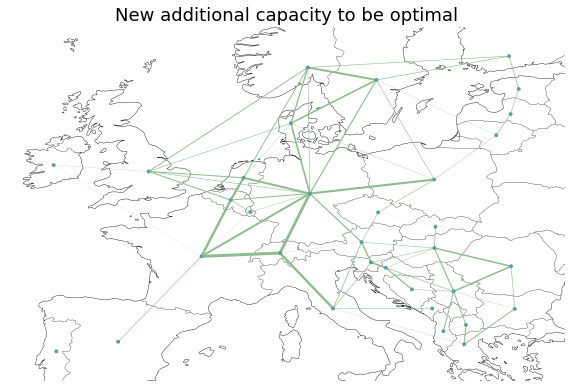

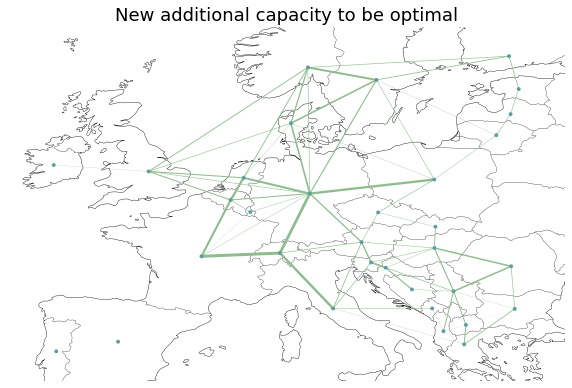

In [26]:
# Minimized networks
bus = 'FR'
init_cap = optimal_net.links.p_nom

for eps in epsilons:
    print(eps)
    net = get_net(f'{eps}_{bus}')
    
    total_cap = net.links.p_nom_opt
    new_cap = total_cap - init_cap
    max_cap = net.links.p_nom_max
    if 1:
        # Plot network
        plt.figure(figsize=(10, 10))
        net.plot(margin=0.1, link_widths=new_cap*0.2, title='New additional capacity to be optimal')
    if 0: 
        # Plot capacities (GW)
        plt.figure()
        init_cap.plot(kind='bar')
        total_cap.plot(kind='bar', alpha=0.6)
        max_cap.plot(kind='bar', alpha=0.3)
        plt.legend(bbox_to_anchor=(1,1), loc="upper left")
        plt.ylabel('GW')
        print(total_cap.sum())
    if 0: 
        # Plot capacities (GWkm)
        plt.figure()
        (init_cap*net.links.length).plot(kind='bar')
        (total_cap*net.links.length).plot(kind='bar', alpha=0.6)
        (max_cap*net.links.length).plot(kind='bar', alpha=0.3)
        plt.legend(bbox_to_anchor=(1,1), loc="upper left")
        plt.ylabel('GWkm')
    if 0:
        # Plot flows
        # Average usage
        p = net.links_t.p0.abs()/total_cap
        p_mean = p.mean()
        plt.figure()
        p_mean.plot(kind='bar')

## Capacities

## Minimum sum of capacity of links adjacent to buses

New capacity when minimizing country capacity
    optimal  0.0125  0.025   0.05    0.1    0.2
FR    87.16   75.09  67.20  55.65  41.09  27.78
DE    70.54   48.40  43.17  38.95  34.83  30.21
BE    34.08   14.56   7.07   3.81   0.00   0.00
CH    33.97   12.58   7.20   1.91   0.00   0.00
GB    31.80   19.61  13.26   3.66   0.00   0.00

New capacity when minimizing whole capacity
    optimal  0.0125  0.025   0.05    0.1    0.2
FR    87.16   85.65  84.29  77.77  65.49  50.14
DE    70.54   58.04  55.06  52.10  49.90  46.57
BE    34.08   25.96  25.46  24.40  24.35  24.33
CH    33.97   23.56  23.04  22.40  20.36  17.34
GB    31.80   31.74  30.76  27.51  21.08  16.33

Capacity decrease (%)
    optimal  0.0125  0.025   0.05    0.1    0.2
FR    100.0   86.15  77.10  63.85  47.15  31.87
DE    100.0   68.62  61.21  55.22  49.38  42.83
BE    100.0   42.72  20.74  11.18   0.00   0.00
CH    100.0   37.03  21.20   5.63   0.00   0.00
GB    100.0   61.66  41.71  11.51   0.00   0.00


<Figure size 864x576 with 0 Axes>

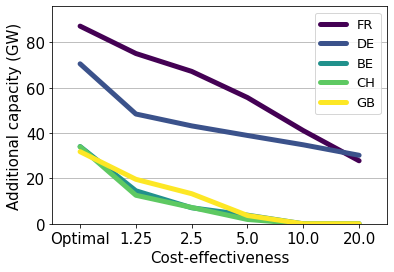

<Figure size 864x576 with 0 Axes>

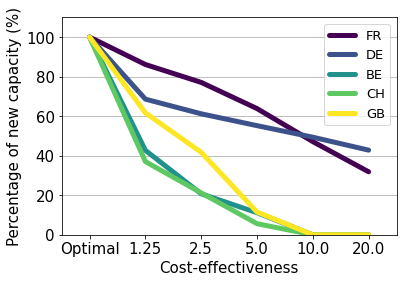

In [48]:
# Check total capacity per country that is minimized
new_capacities_df = pd.DataFrame(index=buses_ids, columns=[optimal_case] + epsilons, dtype=float)
for eps in [optimal_case] + epsilons:
    for bus in buses_ids:
        net = get_net(f'{eps}_{bus}' if eps != optimal_case else eps)
        adjacent_links = net.links[(net.links.bus0 == bus) | (net.links.bus1 == bus)].index
        new_capacities_df.loc[bus, eps] = (net.links.loc[adjacent_links].p_nom_opt 
                                              - net.links.loc[adjacent_links].p_nom).sum()

# Adjacent capacitis in the 'whole' case
whole_new_capacities_df = pd.DataFrame(index=buses_ids, columns=[optimal_case] + epsilons, dtype=float)
for eps in [optimal_case] + epsilons:
    for bus in buses_ids:
        net = get_net(eps)
        adjacent_links = net.links[(net.links.bus0 == bus) | (net.links.bus1 == bus)].index
        whole_new_capacities_df.loc[bus, eps] = (net.links.loc[adjacent_links].p_nom_opt 
                                              - net.links.loc[adjacent_links].p_nom).sum()
        
print(f"New capacity when minimizing country capacity\n{new_capacities_df.round(2)}\n")
print(f"New capacity when minimizing whole capacity\n{whole_new_capacities_df.round(2)}")
c ='viridis'
plt.figure(figsize=(12, 8))
plt.rc('font', size=15) 
ax = new_capacities_df.T.plot(lw=5, colormap=c, solid_capstyle='round')
# whole_new_capacities_df.T.plot(ax=ax, ls='--', lw=5, colormap=c, dash_capstyle='round')
plt.ylim([0, max(new_capacities_df["optimal"])*1.1])
plt.xlabel("Cost-effectiveness")
plt.ylabel("Additional capacity (GW)")
plt.grid(axis='y')
plt.legend(buses_ids, prop={'size': 13})# bbox_to_anchor=(1,1), loc="upper left")
plt.xlim([-0.5, len(epsilons)+0.5])
plt.xticks(ticks=range(len(epsilons)+1), labels=['Optimal'] + [str(e*100) for e in epsilons])

plt.figure(figsize=(12, 8))
plt.rc('font', size=15)
new_cap_perc = new_capacities_df.divide(new_capacities_df['optimal'], axis=0)*100
print(f"\nCapacity decrease (%)\n{new_cap_perc.round(2)}")
new_cap_perc.T.plot(lw=5, solid_capstyle='round', colormap=c)
plt.grid(axis='y')
plt.xlabel("Cost-effectiveness")
plt.xticks(ticks=range(len(epsilons)+1), labels=['Optimal'] + [str(e*100) for e in epsilons])
plt.xlim([-0.5, len(epsilons)+0.5])
plt.ylim([0, 110])
plt.ylabel("Percentage of new capacity (%)")
plt.legend(buses_ids, prop={'size': 13})#, bbox_to_anchor=(1,1), loc="upper left")

    optimal  0.0125   0.025    0.05     0.1     0.2
FR   333.19  330.51  325.54  317.11  305.28  296.87
DE   333.19  311.55  306.63  305.35  306.07  308.21
BE   333.19  321.29  321.01  322.67  322.85  342.06
CH   333.19  316.66  312.07  308.46  314.15  333.68
GB   333.19  330.05  331.75  329.91  334.22  349.37


<Figure size 864x576 with 0 Axes>

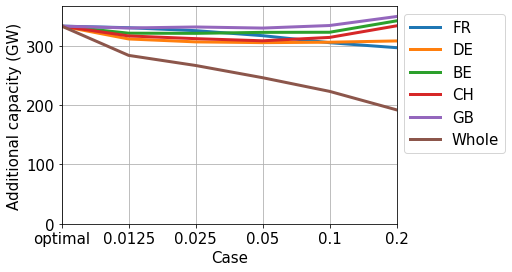

In [28]:
# Check total capacity, per country that is minimized
total_new_capacities_df = pd.DataFrame(index=buses_ids, columns=[optimal_case] + epsilons, dtype=float)
for eps in [optimal_case] + epsilons:
    for bus in buses_ids:
        net = get_net(f'{eps}_{bus}' if eps != optimal_case else eps)
        total_new_capacities_df.loc[bus, eps] = (net.links.p_nom_opt - net.links.p_nom).sum()
        
whole_total_new_capacities_ds = pd.Series(index=[optimal_case] + epsilons, dtype=float)
for eps in [optimal_case] + epsilons:
    net = get_net(eps)
    whole_total_new_capacities_ds[eps] = (net.links.p_nom_opt - net.links.p_nom).sum()

print(total_new_capacities_df.round(2))
plt.figure(figsize=(12, 8))
ax = total_new_capacities_df.T.plot(lw=3)
whole_total_new_capacities_ds.T.plot(ax=ax, lw=3)
plt.ylim([0, max(total_new_capacities_df["optimal"])*1.1])
plt.xlabel("Case")
plt.ylabel("Additional capacity (GW)")
plt.xlim([0, len(epsilons)])
plt.grid()
plt.legend(buses_ids+['Whole'], bbox_to_anchor=(1,1), loc="upper left")

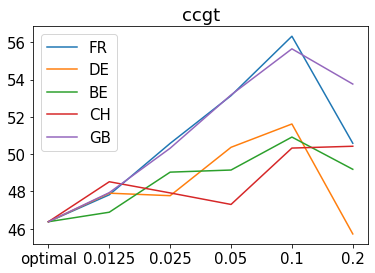

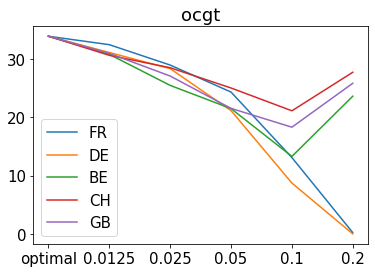

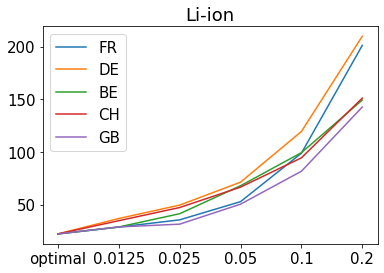

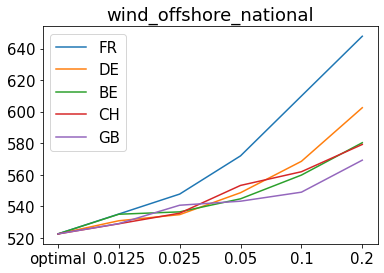

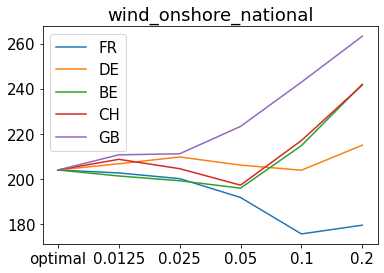

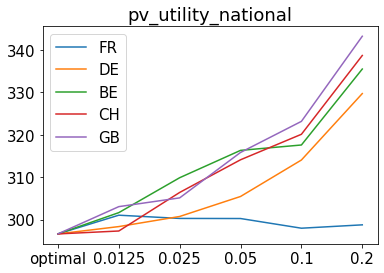

In [29]:
# What is replacing transmission capacity?
techs = ["ccgt", "ocgt", "Li-ion", "wind_offshore_national", "wind_onshore_national", "pv_utility_national"]
for tech in techs:
    total_new_capacities_df = pd.DataFrame(index=buses_ids, columns=[optimal_case] + epsilons, dtype=float)
    for eps in [optimal_case] + epsilons:
        for bus in buses_ids:
            net = get_net(f'{eps}_{bus}' if eps != optimal_case else eps)
            if tech == 'Li-ion':
                sus = net.storage_units[net.storage_units.type == tech]
                total_new_capacities_df.loc[bus, eps] = (sus.p_nom_opt - sus.p_nom).sum()
            else:
                gens = net.generators[net.generators.type == tech]
                total_new_capacities_df.loc[bus, eps] = (gens.p_nom_opt - gens.p_nom).sum()
    total_new_capacities_df.T.plot()
    plt.title(tech)

In [30]:
# TODO: what is again the initial capacity used here?
# TODO: what is the max potential based on? TYNDP?

for eps in epsilons:
    eps_cases = [base_case] + [case.split("_")[1] for case in cases if case.startswith(str(eps))]    
    bus_links_capacities_new_df = pd.DataFrame(columns=eps_cases, index=buses_ids, dtype=float)
    bus_links_capacities_limits_df = pd.DataFrame(index=buses_ids, columns=['init', 'max'], dtype=float)
    total_transmission_capacities_df = pd.DataFrame(index=eps_cases, columns=['new', 'total'], dtype=float)
    
    
    for case in eps_cases:
        total_transmission_capacities_df.loc[case, 'new'] = (net.links.p_nom_opt - net.links.p_nom).sum()
        total_transmission_capacities_df.loc[case, 'total'] = net.links.p_nom_opt.sum()
        for bus in buses_ids:
            adjacent_links = net.links[(net.links.bus0 == bus) | (net.links.bus1 == bus)].index
            bus_links_capacities_new_df.loc[bus, case] = (net.links.loc[adjacent_links].p_nom_opt 
                                                          - net.links.loc[adjacent_links].p_nom).sum()
            if case == base_case:
                bus_links_capacities_limits_df.loc[bus, 'init'] = net.links.loc[adjacent_links].p_nom.sum()
                bus_links_capacities_limits_df.loc[bus, 'max'] = \
                (net.links.loc[adjacent_links].p_nom_max - net.links.loc[adjacent_links].p_nom).sum()

    if eps == epsilons[0]:
        print("Initial and Max addable capacity")
        print(bus_links_capacities_limits_df)
    print('Added capacity')
    print(eps)
    print(bus_links_capacities_new_df.round(2).T)
    print("Total capacity")
    print(total_transmission_capacities_df)

NameError: name 'base_case' is not defined